# Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
from urllib.parse import urlparse
import tldextract
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import learning_curve

# Loading the Train Dataset

In [2]:
df=pd.read_csv("url train dataset.csv",delimiter = ',',encoding = 'unicode_escape', low_memory = False)

In [102]:
df.head()

,domain,label
0,00000kx.rcomhost.com/??SignIn&errmsg=8&pUserId...,1
1,0012091312642.web44.net/cieloquedapremios.com/,1
2,00wwebhost.tk/,1
3,02d34321.linkbucks.com/,1
4,0de0ee94.yyv.co,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13749 entries, 0 to 13748
Data columns (total 2 columns):
domain    13749 non-null object
label     13749 non-null int64
dtypes: int64(1), object(1)
memory usage: 214.9+ KB


In [104]:
df.describe()

,label
count,13749.000000
mean,0.545349
std,0.497957
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Checking dataset distribution

In [105]:
df['label'].value_counts()

1    7498
0    6251
Name: label, dtype: int64

# Plot of unbalanced distribution

In [106]:
df_ublabel0 = df[df.label==0]
df_ublabel1 = df[df.label==1]
df_ubclass = pd.concat([df_ublabel0,df_ublabel1]) 


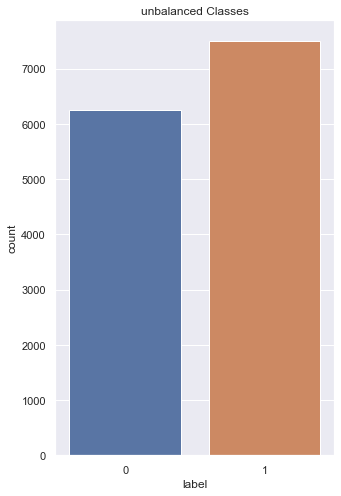

In [107]:
plt.figure(figsize=(5, 8))
sns.countplot('label', data=df_ubclass)
plt.title('unbalanced Classes')
plt.show()

# Resampling and balancing dataset

In [108]:
df_blabel1_resampled = resample(df_ublabel1, replace= False, n_samples=6251)
df_bsampled = pd.concat([df_blabel1_resampled,df_ublabel0]) 
df_bsampled.label.value_counts()                                

1    6251
0    6251
Name: label, dtype: int64

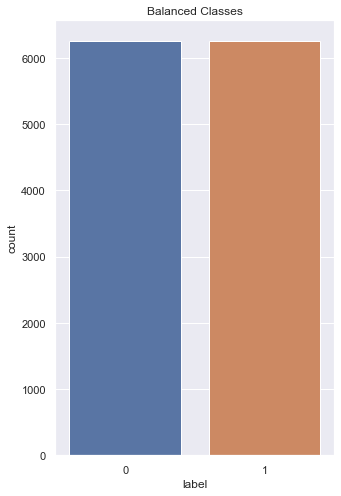

In [109]:
plt.figure(figsize=(5,8))
sns.countplot('label', data=df_bsampled)
plt.title('Balanced Classes')
plt.show()

# Creating Features from train data

In [3]:
# Method to count number of dots
def countdots(url):  
    return url.count('.')



In [4]:
# Method to count number of delimeters
def countdelim(url):
    count = 0
    delim=[';','_','?','=','&']
    for each in url:
        if each in delim:
            count = count + 1
    
    return count

In [5]:
# Is IP addr present as the hostname, let's validate

import ipaddress as ip #works only in python 3

def isip(url):
    try:
        if ip.ip_address(url):
            return 1
    except:
        return 0

In [6]:
#method to check the presence of hyphens

def isPresentHyphen(url):
    return url.count('-')

In [7]:
#method to check the presence of @

def isPresentAt(url):
    return url.count('@')

In [8]:
def isPresentDSlash(url):
    return url.count('//')

In [9]:
def countSubDir(url):
    return url.count('/')

In [10]:
def get_ext(url):
      
    root, ext = splitext(url)
    return ext


In [11]:
def countSubDomain(subdomain):
    if not subdomain:
        return 0
    else:
        return len(subdomain.split('.'))

In [12]:
def countQueries(query):
    if not query:
        return 0
    else:
        return len(query.split('&'))

In [13]:
featureSet = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','label'))

In [22]:
!pip install tldextract

In [14]:

def getFeatures(url, label): 
    result = []
    url = str(url)
    
    #add the url to feature set
    result.append(url)
    
    #parse the URL and extract the domain information
    path = urlparse(url)
    ext = tldextract.extract(url)
    
    #counting number of dots in subdomain    
    result.append(countdots(ext.subdomain))
    
    #checking hyphen in domain   
    result.append(isPresentHyphen(path.netloc))
    
    #length of URL    
    result.append(len(url))
    
    #checking @ in the url    
    result.append(isPresentAt(path.netloc))
    
    #checking presence of double slash    
    result.append(isPresentDSlash(path.path))
    #Count number of subdir    
    result.append(countSubDir(path.path))
    
    #number of sub domain    
    result.append(countSubDomain(ext.subdomain))
    
    #length of domain name    
    result.append(len(path.netloc))
    
    #count number of queries    
    result.append(len(path.query))
    
    #Adding domain information
    
    #if IP address is being used as a URL     
    result.append(isip(ext.domain))
    #result.append(get_ext(path.path))
    result.append(str(label))
    return result

In [15]:
for i in range(len(df)):
    features = getFeatures(df["domain"].loc[i],df["label"].loc[i])    
    featureSet.loc[i] = features

In [123]:
featureSet.head()

,url,no of dots,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,no of queries,is IP,label
0,00000kx.rcomhost.com/??SignIn&errmsg=8&pUserId...,0,0,164,0,0,1,1,0,142,0,1
1,0012091312642.web44.net/cieloquedapremios.com/,0,0,46,0,0,2,1,0,0,0,1
2,00wwebhost.tk/,0,0,14,0,0,1,0,0,0,0,1
3,02d34321.linkbucks.com/,0,0,23,0,0,1,1,0,0,0,1
4,0de0ee94.yyv.co,0,0,15,0,0,0,1,0,0,0,1


In [124]:
featureSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13749 entries, 0 to 13748
Data columns (total 12 columns):
url                         13749 non-null object
no of dots                  13749 non-null object
presence of hyphen          13749 non-null object
len of url                  13749 non-null object
presence of at              13749 non-null object
presence of double slash    13749 non-null object
no of subdir                13749 non-null object
no of subdomain             13749 non-null object
len of domain               13749 non-null object
no of queries               13749 non-null object
is IP                       13749 non-null object
label                       13749 non-null object
dtypes: object(12)
memory usage: 1.4+ MB


# Visualizing of Features


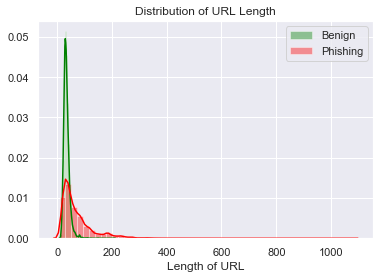

In [16]:
sns.set(style="darkgrid")
sns.distplot(featureSet[featureSet['label']=='0']['len of url'],color='green',label='Benign')
sns.distplot(featureSet[featureSet['label']=='1']['len of url'],color='red',label='Phishing')
plt.title('Distribution of URL Length')
plt.legend(loc='upper right')
plt.xlabel('Length of URL')
plt.show()

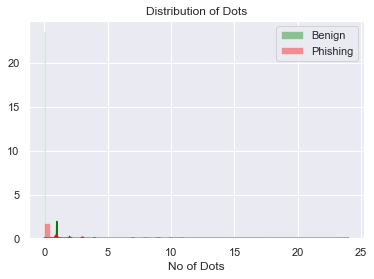

In [126]:
sns.set(style="darkgrid")
sns.distplot(featureSet[featureSet['label']=='0']['no of dots'],color='green',label='Benign')
sns.distplot(featureSet[featureSet['label']=='1']['no of dots'],color='red',label='Phishing')
plt.title('Distribution of Dots')
plt.legend(loc='upper right')
plt.xlabel('No of Dots')
plt.show()

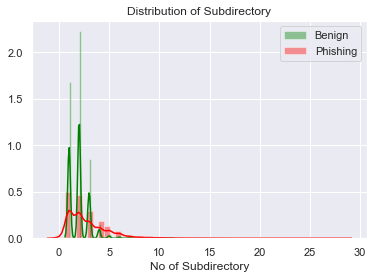

In [127]:
sns.set(style="darkgrid")
sns.distplot(featureSet[featureSet['label']=='0']['no of subdir'],color='green',label='Benign')
sns.distplot(featureSet[featureSet['label']=='1']['no of subdir'],color='red',label='Phishing')
plt.title('Distribution of Subdirectory')
plt.legend(loc='upper right')
plt.xlabel('No of Subdirectory')
plt.show()

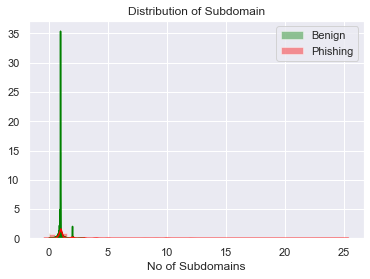

In [128]:
sns.set(style="darkgrid")
sns.distplot(featureSet[featureSet['label']=='0']['no of subdomain'],color='green',label='Benign')
sns.distplot(featureSet[featureSet['label']=='1']['no of subdomain'],color='red',label='Phishing')
plt.title('Distribution of Subdomain')
plt.legend(loc='upper right')
plt.xlabel('No of Subdomains')
plt.show()

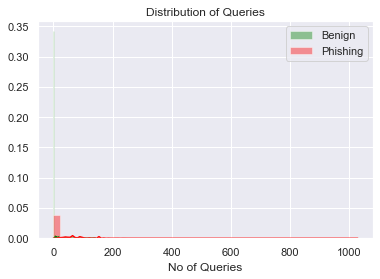

In [129]:
sns.set(style="darkgrid")
sns.distplot(featureSet[featureSet['label']=='0']['no of queries'],color='green',label='Benign')
sns.distplot(featureSet[featureSet['label']=='1']['no of queries'],color='red',label='Phishing')
plt.title('Distribution of Queries')
plt.legend(loc='upper right')
plt.xlabel('No of Queries')
plt.show()

# Splitting the dataset to test and train

In [130]:
X=featureSet.iloc[:,1:11].values
Y=featureSet.iloc[:,11].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [131]:
print(X_train.shape)
print(Y_train.shape)

(10999, 10)
(10999,)


In [132]:
print(X_test.shape)
print(Y_test.shape)

(2750, 10)
(2750,)


# Training classifiers and testing without hyper parameter tuning

In [133]:
print('Decision Tree Classifier')
clf1 = tree.DecisionTreeClassifier()
clf1.fit(X_train,Y_train)
Y_pred = clf1.predict(X_test)
print('Accuraccy : %f' % metrics.accuracy_score(Y_test, Y_pred))

Decision Tree Classifier
Accuraccy : 0.807636


In [134]:
print('Adaboost Classifier')
clf2 = AdaBoostClassifier()
clf2.fit(X_train,Y_train)
Y_pred = clf2.predict(X_test)
print('Accuraccy : %f' % metrics.accuracy_score(Y_test, Y_pred))

Adaboost Classifier
Accuraccy : 0.799636


In [135]:
print('Logistic Regression Classifier')
clf3 = LogisticRegression()
clf3.fit(X_train,Y_train)
Y_pred = clf3.predict(X_test)
print('Accuraccy : %f' % metrics.accuracy_score(Y_test, Y_pred))

Logistic Regression Classifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuraccy : 0.765455


In [136]:
print('Gaussian NB Classifier')
clf4 = GaussianNB()
clf4.fit(X_train,Y_train)
Y_pred = clf4.predict(X_test)
print('Accuraccy : %f' % metrics.accuracy_score(Y_test, Y_pred))

Gaussian NB Classifier
Accuraccy : 0.658545


In [137]:
print('KNN Classifier')
clf5 = KNeighborsClassifier()
clf5.fit(X_train,Y_train)
Y_pred = clf5.predict(X_test)
print('Accuraccy : %f' % metrics.accuracy_score(Y_test, Y_pred))

KNN Classifier
Accuraccy : 0.786545


# Hyper parameter tuning using GridSearch CV

In [138]:
print('Decision Tree Classifier')
param_grid = {"criterion" : ["gini", "entropy"],
              "max_depth": [3,5,20,30],
              "splitter" : ["best","random"]
             }
griddt = GridSearchCV(estimator=clf1, param_grid=param_grid)
griddt.fit(X_train,Y_train)
print(griddt)
# summarize the results of the grid search
print(griddt.best_score_)
print(griddt.best_estimator_.max_depth)
print(griddt.best_estimator_.criterion)
print(griddt.best_estimator_.splitter)

Decision Tree Classifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 20, 30],
                  

In [139]:
print('Adaboost Classifier')
param_grid = {"learning_rate" : [1,2,3,5,6],
              "n_estimators": [5,10,15,25,50],
              }
griddt = GridSearchCV(estimator=clf2, param_grid=param_grid)
griddt.fit(X_train,Y_train)
print(griddt)
# summarize the results of the grid search
print(griddt.best_score_)
print(griddt.best_estimator_.learning_rate)
print(griddt.best_estimator_.n_estimators)

Adaboost Classifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1, 2, 3, 5, 6],
                         'n_estimators': [5, 10, 15, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.798618056186926
1
50


In [140]:
print('Logistic Regression Classifier')
param_grid = {"penalty" : ["l1","l2"],
              "C": [0.1,0.5,1,1.5],
              }
griddt = GridSearchCV(estimator=clf3, param_grid=param_grid)
griddt.fit(X_train,Y_train)
print(griddt)
# summarize the results of the grid search
print(griddt.best_score_)
print(griddt.best_estimator_.penalty)
print(griddt.best_estimator_.C)

Logistic Regression Classifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 1.5], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7691608328029821
l1
1


In [141]:
print('KNN Classifier')
param_grid = {"n_neighbors" : [1,2,3,4,5],
              "weights": ["uniform","distance"],
              }
griddt = GridSearchCV(cv=5,estimator=clf5, param_grid=param_grid)
griddt.fit(X_train,Y_train)
print(griddt)
# summarize the results of the grid search
print(griddt.best_score_)
print(griddt.best_estimator_.n_neighbors)
print(griddt.best_estimator_.weights)

KNN Classifier
GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.793163014819529
4
distance


# Training and validating the classifiers with tuned hyper parameters using learning curves

Decision Tree Classifier
Accuracy: 0.812345 (+/- 0.01)


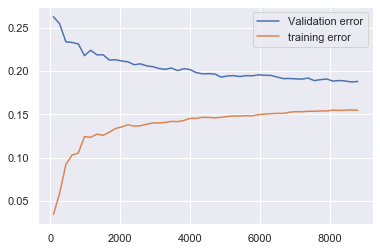

In [142]:
print('Decision Tree Classifier')
clf1 = tree.DecisionTreeClassifier(max_depth =30 , criterion = 'gini', splitter = 'random')
clf1.fit(X_train,Y_train)
scores_1 = cross_val_score(clf1, X_train, Y_train, cv=5)
print("Accuracy: %f (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2))
train_sizes, train_scores,validation_scores = learning_curve(clf1,X_train,Y_train,cv=5,scoring='accuracy', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50)
)
train_mean = np.mean(1-train_scores, axis=1)
validation_mean = np.mean(1-validation_scores, axis=1)
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.plot(train_sizes, train_mean, label = 'training error')
plt.legend()

Adaboost Classifier
Accuracy: 0.799345 (+/- 0.01)


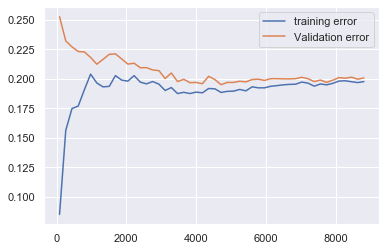

In [143]:
print('Adaboost Classifier')
clf2 = AdaBoostClassifier(learning_rate = 1, n_estimators = 50)
clf2.fit(X_train,Y_train)
scores_2 = cross_val_score(clf2, X_train, Y_train, cv=5)
print("Accuracy: %f (+/- %0.2f)" % (scores_2.mean(), scores_2.std() * 2))
train_sizes, train_scores,validation_scores = learning_curve(clf2,X_train,Y_train,cv=5,scoring='accuracy', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50)
)
train_mean = np.mean(1-train_scores, axis=1)
validation_mean = np.mean(1-validation_scores, axis=1)
plt.plot(train_sizes, train_mean, label = 'training error')
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.legend()

Logistic Regression Classifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 0.769524 (+/- 0.01)


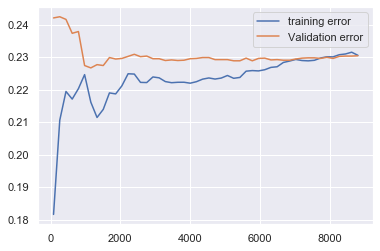

In [144]:
print('Logistic Regression Classifier')
clf3 = LogisticRegression(penalty = 'l1', C = 1.5)
clf3.fit(X_train,Y_train)
scores_3 = cross_val_score(clf3, X_train, Y_train, cv=5)
print("Accuracy: %f (+/- %0.2f)" % (scores_3.mean(), scores_3.std() * 2))
train_sizes, train_scores,validation_scores=learning_curve(clf3,X_train,Y_train,cv=5,scoring='accuracy', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(1-train_scores, axis=1)
validation_mean = np.mean(1-validation_scores, axis=1)
plt.plot(train_sizes, train_mean, label = 'training error')
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.legend()

Gaussian NB Classifier
Accuracy: 0.668606 (+/- 0.02)


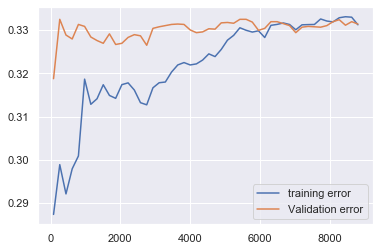

In [145]:
print('Gaussian NB Classifier')
clf4 = GaussianNB()
clf4.fit(X_train,Y_train)
scores_4 = cross_val_score(clf4, X_train, Y_train, cv=5)
print("Accuracy: %f (+/- %0.2f)" % (scores_4.mean(), scores_4.std() * 2))
train_sizes, train_scores,validation_scores = learning_curve(clf4,X_train,Y_train,cv=5,scoring='accuracy', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50)
)
train_mean = np.mean(1-train_scores, axis=1)
validation_mean = np.mean(1-validation_scores, axis=1)
plt.plot(train_sizes, train_mean, label = 'training error')
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.legend()

KNN Classifier
Accuracy: 0.793163 (+/- 0.01)


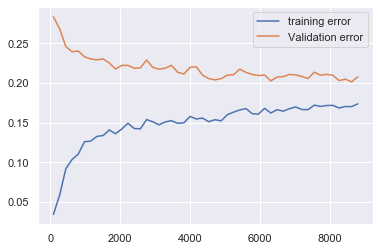

In [146]:
print('KNN Classifier')
clf5 = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
clf5.fit(X_train,Y_train)
scores_5 = cross_val_score(clf5, X_train, Y_train, cv=5)
print("Accuracy: %f (+/- %0.2f)" % (scores_5.mean(), scores_5.std() * 2))
train_sizes, train_scores,validation_scores = learning_curve(clf5,X_train,Y_train,cv=5,scoring='accuracy', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50)
)
train_mean = np.mean(1-train_scores, axis=1)
validation_mean = np.mean(1-validation_scores, axis=1)
plt.plot(train_sizes, train_mean, label = 'training error')
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.legend()

# Boxplot of error vs classifiers

([<matplotlib.axis.XTick at 0x23868be6b00>,
 <a list of 5 Text xticklabel objects>)

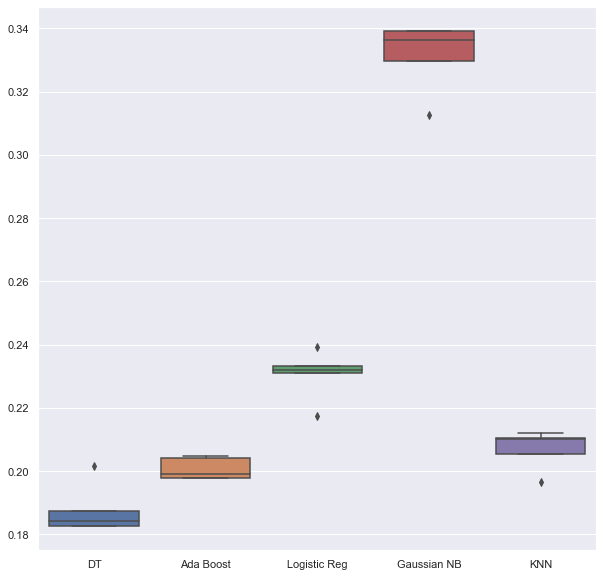

In [147]:
error = [1-scores_1,1-scores_2,1-scores_3,1-scores_4,1-scores_5]
plt.figure(figsize=(10,10 ))
sns.boxplot(data = error)
plt.xticks([0,1,2,3,4], ['DT','Ada Boost', 'Logistic Reg', 'Gaussian NB', 'KNN'])

# Reducing the variance of best classifier (DT)

Decision Tree Classifier
Accuracy: 0.810617 (+/- 0.02)


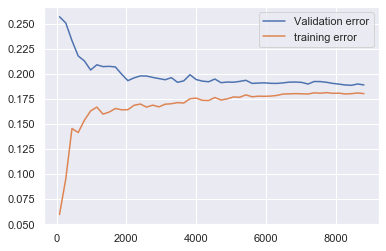

In [148]:
print('Decision Tree Classifier')
clf1 = tree.DecisionTreeClassifier(max_depth =7, criterion = 'gini', splitter = 'best')
clf1.fit(X_train,Y_train)
scores_1 = cross_val_score(clf1, X_train, Y_train, cv=10)
print("Accuracy: %f (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2))
train_sizes, train_scores,validation_scores = learning_curve(clf1,X_train,Y_train,cv=5,scoring='accuracy', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50)
)
train_mean = np.mean(1-train_scores, axis=1)
validation_mean = np.mean(1-validation_scores, axis=1)
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.plot(train_sizes, train_mean, label = 'training error')
plt.legend()

# Testing the best classifier (DT)

Decision Tree Classifier
Accuraccy : 0.814545
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1216
           1       0.88      0.78      0.82      1534

    accuracy                           0.81      2750
   macro avg       0.82      0.82      0.81      2750
weighted avg       0.82      0.81      0.82      2750



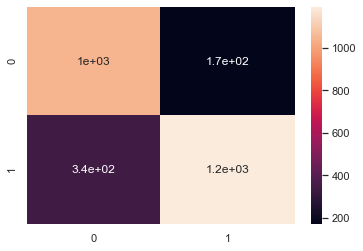

In [149]:
print('Decision Tree Classifier')
Y_pred = clf1.predict(X_test)
from sklearn import metrics
print('Accuraccy : %f' % metrics.accuracy_score(Y_test, Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
cr = classification_report(Y_test,Y_pred)
sns.heatmap(cm,annot=True,cbar=True,xticklabels='auto',yticklabels='auto')
print(cr)

# Transfer learning of best classifier on new dataset using DT

In [150]:
dftl=pd.read_csv("url transfer dataset.csv",delimiter = ',',encoding = 'unicode_escape', low_memory = False)

In [151]:
dftl.describe()

,label
count,6500.000000
mean,0.499846
std,0.500038
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [152]:
featureSettl = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','label'))

In [153]:
for i in range(len(dftl)):
    featurestl = getFeatures(dftl["domain"].loc[i], dftl["label"].loc[i])    
    featureSettl.loc[i] = featurestl

In [154]:
featureSettl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
url                         6500 non-null object
no of dots                  6500 non-null object
presence of hyphen          6500 non-null object
len of url                  6500 non-null object
presence of at              6500 non-null object
presence of double slash    6500 non-null object
no of subdir                6500 non-null object
no of subdomain             6500 non-null object
len of domain               6500 non-null object
no of queries               6500 non-null object
is IP                       6500 non-null object
label                       6500 non-null object
dtypes: object(12)
memory usage: 660.2+ KB


In [155]:
featureSettl.head()

,url,no of dots,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,no of queries,is IP,label
0,www313.paypal.ca.36903.securessl-100.mx/js/web...,3,0,84,0,0,5,4,0,23,0,1
1,neil.fraser.name/software/moobrowser/,0,0,37,0,0,3,1,0,0,0,0
2,secure.runescape.com.yywow.asia/m=weblogin/log...,2,0,84,0,0,2,3,0,26,0,1
3,cmc.uib.no/moo/docs/shorter/quick-prog-ref.txt,0,0,46,0,0,4,1,0,0,0,0
4,www179.paypal.ca.92651.securessl-410.mx/js/web...,3,0,82,0,0,5,4,0,21,0,1


In [156]:
X_testtl=featureSettl.iloc[:,1:11].values
Y_testtl=featureSettl.iloc[:,11].values
print(X_testtl.shape)
print(Y_testtl.shape)

(6500, 10)
(6500,)


Decision Tree Classifier
Accuraccy : 0.836615
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3251
           1       0.82      0.86      0.84      3249

    accuracy                           0.84      6500
   macro avg       0.84      0.84      0.84      6500
weighted avg       0.84      0.84      0.84      6500



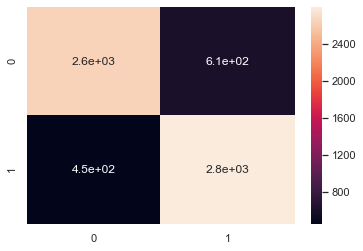

In [157]:
print('Decision Tree Classifier')
Y_predtl = clf1.predict(X_testtl)
print('Accuraccy : %f' % metrics.accuracy_score(Y_testtl, Y_predtl))
cm = confusion_matrix(Y_testtl, Y_predtl)
cr = classification_report(Y_testtl, Y_predtl)
sns.heatmap(cm,annot=True,cbar=True,xticklabels='auto',yticklabels='auto')
print(cr)

# Demo using DT

In [158]:
result = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','label'))
results = getFeatures('https://www.google.com/', '')
result.loc[0] = results
result = result.drop(['url','label'],axis=1).values
print(clf1.predict(result))

['0']


In [159]:
result = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','label'))
results = getFeatures('http://12.34.56.78/firstgenericbank/account-update/', '')
result.loc[0] = results
result = result.drop(['url','label'],axis=1).values
print(clf1.predict(result))

['1']
